In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

In [124]:
df_iris = pd.read_csv("datasets_19_420_Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Histogram

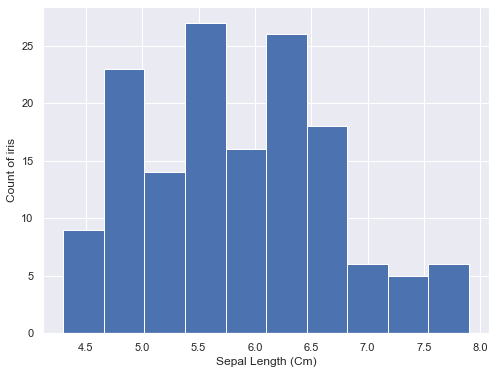

In [340]:
plt.figure(figsize=(8,6))
plt.hist(df_iris['SepalLengthCm'])
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Count of iris')
plt.show()

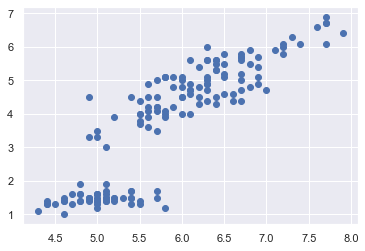

In [120]:
plt.scatter('SepalLengthCm','PetalLengthCm', data=df_iris)

# Bee swarm plot

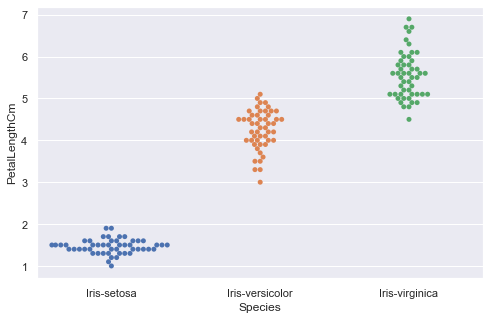

In [116]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='Species', y='PetalLengthCm', data=df_iris)
plt.show()

# Box plot

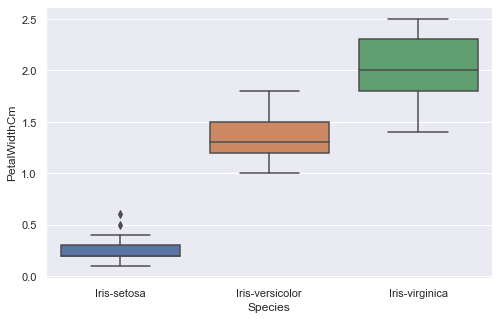

In [115]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Species', y='PetalWidthCm', data=df_iris)
plt.show()

# ECDF

In [373]:
def ecdf(value):
    n_sort=np.sort(value)
    ecdf=np.arange(1,len(n_sort)+1)/len(n_sort)
    return plt.figure(figsize=(8,6)), plt.plot(n_sort, ecdf), plt.ylabel('ECDF'),np.mean(n_sort), plt.show()

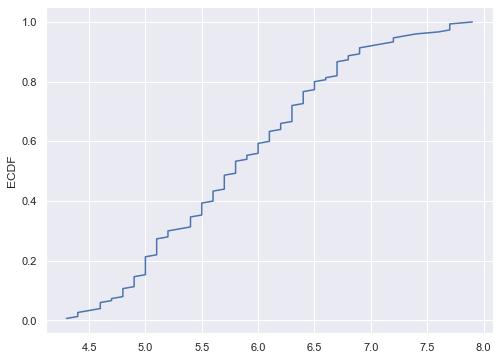

(<Figure size 576x432 with 1 Axes>,
 Text(17.200000000000003, 0.5, 'ECDF'),
 5.843333333333334,
 None)

In [374]:
ecdf(df_iris['SepalLengthCm'])

# Generating bootstrap samples

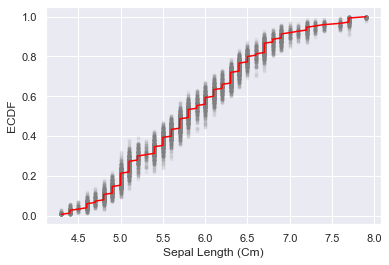

In [193]:
for i in range(100):
    samples=np.random.choice(df_iris['SepalLengthCm'], size=len(df_iris['SepalLengthCm']))
    n_sort=np.sort(samples)
    ecdf=np.arange(1,len(n_sort)+1)/len(n_sort)
    plt.plot(n_sort,ecdf, marker='.', linestyle='none', color='gray', alpha=0.08)
n_sort=np.sort(df_iris['SepalLengthCm'])   
ecdf=np.arange(1,len(n_sort)+1)/len(n_sort)
plt.plot(n_sort,ecdf, color='red')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('ECDF')
plt.show()

# Bootstrap Function

In [312]:
def bootstrap_replicate(data, func, number_of_samples):
    array=np.empty(number_of_samples)
    for i in range(number_of_samples):
        samples=np.random.choice(data, size=len(data))
        print('Sample:',samples, 'Value of function:',func(samples))

In [313]:
bootstrap_replicate(df_iris['SepalLengthCm'], np.mean, 10)

Sample: [5.8 5.1 6.  5.  5.  6.3 4.8 6.1 4.6 4.4 5.7 4.9 6.1 6.4 5.2 6.5 6.9 6.4
 6.5 5.  7.7 4.8 6.2 4.4 6.3 7.7 5.7 6.6 6.4 5.4 5.5 5.8 5.7 5.8 5.5 5.4
 5.1 5.8 7.7 5.2 5.5 5.3 5.5 5.6 5.7 6.2 4.8 6.5 5.6 5.2 6.5 5.5 5.8 6.1
 4.4 6.4 5.8 7.9 6.3 5.9 5.7 6.7 6.2 5.7 7.7 5.6 6.5 5.8 6.4 6.4 5.  4.6
 5.  7.7 5.4 6.9 5.5 5.  6.7 5.5 5.4 5.1 6.4 6.9 6.5 5.1 6.7 6.1 5.6 6.5
 4.9 4.7 6.3 6.7 6.3 4.4 6.3 7.7 6.9 4.9 5.  6.8 6.6 5.  5.1 7.2 6.1 6.8
 6.3 5.8 7.1 5.7 4.4 6.  6.3 5.  4.3 5.2 5.6 6.6 6.1 6.  6.9 5.2 6.7 4.5
 6.1 4.9 6.5 7.6 7.2 7.1 5.6 5.  6.4 6.6 4.6 6.6 5.9 6.  5.1 5.  7.6 5.
 5.1 6.  5.5 5.8 6.  6.4] Value of function: 5.888
Sample: [7.1 5.4 4.6 5.7 4.7 6.2 5.  7.7 6.3 5.1 6.7 4.6 6.  5.6 5.2 6.4 5.1 4.9
 5.  5.  6.1 5.  5.4 4.8 6.3 5.5 6.  6.4 6.3 6.1 7.2 4.6 5.6 6.3 6.3 7.7
 4.6 5.3 5.1 6.7 6.  5.7 7.6 5.8 6.7 5.7 5.9 4.4 4.9 5.  6.8 5.7 6.1 5.4
 7.7 6.  7.2 5.6 7.7 4.6 4.7 6.5 7.7 5.7 5.8 6.6 5.6 7.2 5.5 5.6 6.7 5.6
 5.1 5.  6.3 6.2 6.4 7.2 6.2 6.1 6.7 4.9 5.1 5.2 5.2 6.3 5

# Linear Regression

In [126]:
#calculate coef. a,b by method of least squares
a,b=np.polyfit(df_iris['SepalLengthCm'],df_iris['PetalLengthCm'], deg=1)

In [138]:
#calculate x,y for linear regression line
x_line=np.array([4,8])
y_line=a*x_line+b

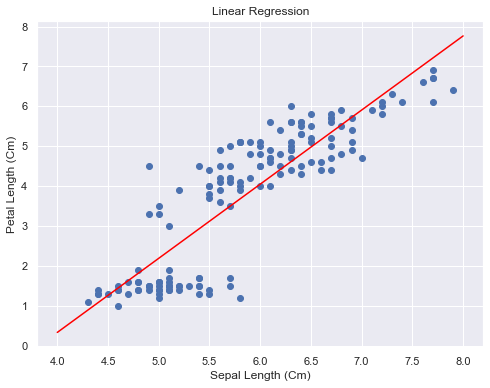

In [149]:
plt.figure(figsize=(8,6))
plt.plot(x_line,y_line, color='red')
plt.scatter(df_iris['SepalLengthCm'],df_iris['PetalLengthCm'])
plt.title('Linear Regression')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Petal Length (Cm)')
plt.show()

# Linear Regression with Bootstrap

In [327]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Initialize replicates: slope_reps, intercept_reps
    inds = np.arange(len(x))
    slope_reps = np.empty(size)
    intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        slope_reps[i], intercept_reps[i] = np.polyfit(bs_x,bs_y, deg=1)

    return slope_reps, intercept_reps

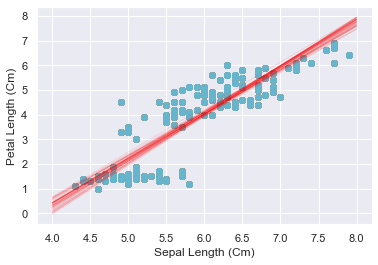

In [334]:
slope_reps, intercept_reps = draw_bs_pairs_linreg(df_iris['SepalLengthCm'],df_iris['PetalLengthCm'], size=1000)
x=np.array([4,8])
for i in range(50):
    plt.plot(x,slope_reps[i]*x+intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')
    plt.scatter(df_iris['SepalLengthCm'],df_iris['PetalLengthCm'])
    plt.xlabel('Sepal Length (Cm)')
    plt.ylabel('Petal Length (Cm)')
    

# Random Permutation

[-1.   1.   1.   2.   2.   2.5  3.   3.   3.   3.   3.5  4.   4.   4.
  4.   4.   4.5  5.   5.   5.   5.   5.   5.   5.   5.   5.   5.   5.
  5.   5.   5.   6.   6.   6.   6.   6.5  7.   7.   7.   8.   8. ]
[-1.09361202  0.09737167  1.85872334 -1.29112355 -1.20007914 -0.59102176
  0.7308361  -1.06194511 -0.96301477  1.3531809  -0.60625969  0.20372203
 -0.26217075 -0.07958872  0.36751385  1.27732258 -0.72869924  0.92293125
  0.61693191  1.61267243  0.06440137  1.41024061  1.90825835  0.57544824
  0.22310273  0.4353711   1.00455526  0.98956463 -1.26064729  1.96097404
  0.16899617 -0.71721787  0.6633106   1.42078428 -1.30394383  0.785301
  0.63799863 -0.11268433 -1.68802145  1.86001225 -0.22301994]


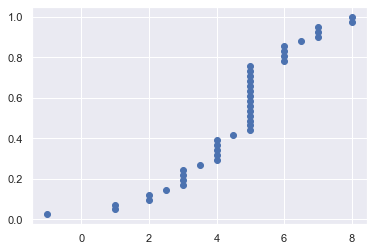

In [375]:
value=[1,2,4,6,3,4,4,4.5,3.5,-1,2.5,6.5,8,6,5,4,3,5,7,5,3,5,5,5,5,5,5,5,5,5,5,5,6,7,1,2,3,4,6,7,8]
norm=np.random.normal(size=len(value))
sort=np.sort(value)
ecdf=np.arange(1,len(sort)+1)/len(sort)
sort_norm=np.sort(norm)
ecdf_norm=np.arange(1,len(sort_norm)+1)/len(sort_norm)
plt.scatter(sort,ecdf)
#plt.scatter(sort_norm,ecdf_norm)
print(sort)
print(norm)